## Data Loading, Exploration, and Initial Analysis

This code performs the following steps:

- **Import necessary libraries** for data handling (`numpy`, `pandas`), visualization (`matplotlib`, `seaborn`), and file upload in Google Colab.
- **Upload and load the dataset** (`train.csv`) into a Pandas DataFrame.
- **Display basic dataset information** including shape, data types, and count of missing values using `.info()`.
- **Preview the dataset** by showing the first few rows with `.head()`.
- **Generate a statistical summary** of numerical columns using `.describe()`.
- **Analyze survival rates by passenger class** to observe the impact of socio-economic status.
- **Examine age distribution effects** on survival by grouping passengers into age quintiles.
- **Explore survival rates by gender**, highlighting differences between males and females.
- **Analyze survival by fare groups**, splitting fares into three categories to study their effect on survival.
- **Identify missing values** in each column to understand data completeness.

This foundational exploration helps reveal key patterns and potential challenges (like missing data) in the Titanic dataset, preparing it for deeper analysis and modeling.


In [ ]:
# Loading train.csv and test.csv and importing all required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
train = pd.read_csv("train.csv")

Saving train.csv to train (3).csv


In [ ]:
# Basic dataset information (shape, data types, missing values)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# First few rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# statistical summary
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Survival rate by passenger class
train['Survived'].groupby(train['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
# Age distribution of survivors vs non-survivors
train['Survived'].groupby(pd.qcut(train['Age'], 5)).mean()

/tmp/ipython-input-278281412.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train['Survived'].groupby(pd.qcut(train['Age'], 5)).mean()


,Survived
Age,
"(0.419, 19.0]",0.481707
"(19.0, 25.0]",0.328467
"(25.0, 31.8]",0.393701
"(31.8, 41.0]",0.437500
"(41.0, 80.0]",0.373239


In [ ]:
# Gender-based survival analysis
train['Survived'].groupby(train['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
# Fare distribution analysis
train['Survived'].groupby(pd.qcut(train['Fare'], 3)).mean()

/tmp/ipython-input-2998840235.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train['Survived'].groupby(pd.qcut(train['Fare'], 3)).mean()


,Survived
Fare,
"(-0.001, 8.662]",0.198052
"(8.662, 26.0]",0.402778
"(26.0, 512.329]",0.559322


In [ ]:
# missing values in each column
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Data Preprocessing, Feature Engineering, and Correlation Analysis

This code performs several key preprocessing steps to prepare the dataset for modeling:

- **Handling Missing Values:**  
  - Fills missing `Age` values with the median age.  
  - Fills missing `Embarked` values with the most common port (mode).

- **Feature Extraction:**  
  - Extracts passenger titles (e.g., Mr., Mrs., Miss) from the `Name` column, which may carry important social or demographic information.  
  - Creates a new feature `FamilySize` by combining the number of siblings/spouses (`SibSp`) and parents/children (`Parch`) aboard, plus the passenger themselves.

- **Binning Continuous Variables:**  
  - Groups `Age` into categorical bins (`Child`, `Teen`, `Adult`, `Senior`).  
  - Divides `Fare` into quartile-based categories (`Low`, `Medium`, `High`, `VeryHigh`).

- **Encoding Categorical Variables:**  
  - Converts `Sex` into numerical values (male=0, female=1).  
  - One-hot encodes the `Embarked` categorical variable.  
  - One-hot encodes the newly created categorical features: `Name_Title`, `AgeGroup`, and `FareRange`, dropping the first category in each to avoid multicollinearity.

- **Dropping Irrelevant Columns:**  
  - Removes columns unlikely to help the model (`PassengerId`, `Name`, `Ticket`, `Cabin`).

- **Preparing Features and Target:**  
  - Separates the feature matrix `X` (all columns except `Survived`) and target vector `y` (`Survived` column) as NumPy arrays for model input.

- **Feature Correlation Analysis:**  
  - Computes the correlation matrix for numeric features to understand relationships between variables.  
  - Visualizes correlations using a heatmap for intuitive pattern recognition.  
  - Prints correlations of all features with the target variable `Survived`, sorted to identify the most influential features.

This process improves the dataset's quality and helps identify which features are most predictive of survival, guiding further modeling decisions.


In [ ]:
# filling missing Age values with median
train['Age'] = train['Age'].fillna(train['Age'].median())

In [ ]:
# filling missing Embarked values with mode
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [ ]:
# Extracting titles from names (Mr., Mrs., Miss, etc.)
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train['Name_Title'].value_counts()

,count
Name_Title,
Mr.,517
Miss.,182
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Col.,2
Mlle.,2
Major.,2


In [ ]:
# Creating family size feature (SibSp + Parch + 1)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [ ]:
# Bin for continuous variables (Age groups, Fare ranges)
train['AgeGroup'] = pd.cut(
    train['Age'],
    bins=[0, 12, 18, 60, 100],
    labels=['Child', 'Teen', 'Adult', 'Senior']
)

train['FareRange'] = pd.qcut(
    train['Fare'],
    4,
    labels=['Low', 'Medium', 'High', 'VeryHigh']
)

In [ ]:
# Converting Sex to numerical (0/1)
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# One-hot encoding Embarked
train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')

In [ ]:
# Droping irrelevant columns (PassengerId, Name, Ticket)
train = train.drop(columns=['PassengerId', 'Name', 'Ticket','Cabin'])

In [ ]:
# One-hot encoding few other features
train = pd.get_dummies(train, columns=["Name_Title", "AgeGroup", "FareRange"], drop_first=True)

In [ ]:
# Selecting the final processed datset
X = train.drop(columns=['Survived']).values
y = train['Survived'].values

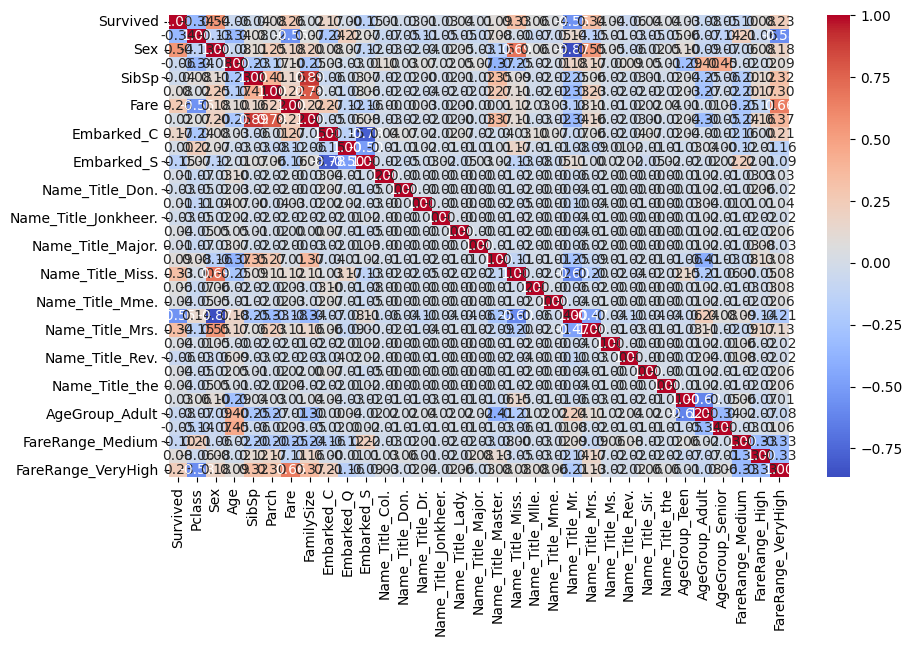

Survived                1.000000
Sex                     0.543351
Name_Title_Mrs.         0.339040
Name_Title_Miss.        0.327093
Fare                    0.257307
FareRange_VeryHigh      0.233638
Embarked_C              0.168240
Name_Title_Master.      0.085221
FareRange_High          0.084239
Parch                   0.081629
Name_Title_Mlle.        0.060095
Name_Title_Lady.        0.042470
Name_Title_Mme.         0.042470
Name_Title_Ms.          0.042470
Name_Title_Sir.         0.042470
Name_Title_the          0.042470
AgeGroup_Teen           0.026859
FamilySize              0.016639
Name_Title_Major.       0.011329
Name_Title_Col.         0.011329
Name_Title_Dr.          0.008185
Embarked_Q              0.003650
Name_Title_Don.        -0.026456
Name_Title_Jonkheer.   -0.026456
SibSp                  -0.035322
AgeGroup_Senior        -0.051224
Age                    -0.064910
Name_Title_Rev.        -0.064988
AgeGroup_Adult         -0.079185
FareRange_Medium       -0.095648
Embarked_S

In [ ]:
# Analyzing feature correlations
corr_matrix = train.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()
target_corr = corr_matrix['Survived'].sort_values(ascending=False)
print(target_corr)


## Decision Tree and Random Forest Implementation

This code implements a custom **Decision Tree** and **Random Forest** classifier from scratch using only `numpy` and `random` for computations.

### Decision Tree

- **Initialization:**  
  Parameters such as `max_depth`, `min_samples_split`, and impurity `criterion` (`gini` or `entropy`) control tree growth and splitting.

- **Impurity Calculations:**  
  Implements `gini_impurity` and `entropy` functions to measure node impurity.

- **Information Gain:**  
  Calculates the reduction in impurity from splitting a dataset on a feature threshold.

- **Best Split Selection:**  
  Iterates over all features and possible thresholds to find the split that yields the highest information gain.

- **Recursive Tree Building:**  
  Builds the tree by recursively splitting nodes until stopping criteria are met (max depth, minimum samples, or pure node).

- **Prediction:**  
  Traverses the tree for each sample to predict class labels.

### Random Forest

- **Initialization:**  
  Defines number of trees (`n_estimators`), tree depth, minimum samples per split, and number of features considered per split (`max_features`).

- **Bootstrap Sampling:**  
  Generates random samples with replacement to train each tree independently.

- **Random Feature Selection:**  
  Selects a random subset of features for training each tree to increase diversity and reduce correlation between trees.

- **Training:**  
  Fits multiple decision trees on bootstrap samples with selected features.

- **Prediction:**  
  Aggregates predictions from all trees using majority voting for classification.

- **Probability Prediction:**  
  Computes class probabilities based on the frequency of votes across trees.

This implementation provides a foundational understanding of how decision trees and random forests work internally and allows for customization of key hyperparameters without relying on external machine learning libraries.


In [ ]:
# Decision tree implementation
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, criterion='gini'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.tree = None

    def gini_impurity(self, y):
        classes, counts = np.unique(y, return_counts=True)
        impurity = 1 - sum((count / len(y)) ** 2 for count in counts)
        return impurity

    def entropy(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probs = counts / len(y)
        return -np.sum(probs * np.log2(probs + 1e-9))

    def information_gain(self, X, y, feature, threshold):
        parent_impurity = self.gini_impurity(y) if self.criterion == 'gini' else self.entropy(y)

        left_mask = X[:, feature] <= threshold
        right_mask = X[:, feature] > threshold
        n, n_left, n_right = len(y), np.sum(left_mask), np.sum(right_mask)

        if n_left == 0 or n_right == 0:
            return 0

        left_impurity = self.gini_impurity(y[left_mask]) if self.criterion == 'gini' else self.entropy(y[left_mask])
        right_impurity = self.gini_impurity(y[right_mask]) if self.criterion == 'gini' else self.entropy(y[right_mask])

        weighted_impurity = (n_left / n) * left_impurity + (n_right / n) * right_impurity

        return parent_impurity - weighted_impurity

    def best_split(self, X, y):
        best_gain = 0
        best_feature, best_threshold = None, None
        n_samples, n_features = X.shape

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gain = self.information_gain(X, y, feature, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def split_data(self, X, y, feature, threshold):
        left_mask = X[:, feature] <= threshold
        right_mask = X[:, feature] > threshold
        return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

    def build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_labels = len(np.unique(y))

        if ((self.max_depth is not None and depth >= self.max_depth) or
        num_labels == 1 or
        num_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return {"type": "leaf", "class": leaf_value}

        feature, threshold = self.best_split(X, y)
        if feature is None:
            return {"type": "leaf", "class": self._most_common_label(y)}

        X_left, y_left, X_right, y_right = self.split_data(X, y, feature, threshold)
        if len(y_left) == 0 or len(y_right) == 0:
            return {"type": "leaf", "class": self._most_common_label(y)}

        left_branch = self.build_tree(X_left, y_left, depth + 1)
        right_branch = self.build_tree(X_right, y_right, depth + 1)

        return {"type": "node", "feature": feature, "threshold": threshold,
                "left": left_branch, "right": right_branch}

    def _most_common_label(self, y):
        values, counts = np.unique(y, return_counts=True)
        return values[np.argmax(counts)]

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def predict_sample(self, x, node=None):
        if node is None:
            node = self.tree
        if node['type'] == 'leaf':
            return node['class']
        if x[node['feature']] <= node['threshold']:
            return self.predict_sample(x, node['left'])
        else:
            return self.predict_sample(x, node['right'])

    def predict(self, X):
        return np.array([self.predict_sample(sample) for sample in X])


In [ ]:
# Random forest implementation
class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None,
                 min_samples_split=2, max_features='sqrt'):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def random_feature_selection(self, n_features):
        if self.max_features == 'sqrt':
            size = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            size = int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            size = self.max_features
        else:
            size = n_features
        return random.sample(range(n_features), size)

    def fit(self, X, y):
        self.trees = []
        n_features = X.shape[1]

        for _ in range(self.n_estimators):
            tree = DecisionTree(max_depth=self.max_depth,
                                min_samples_split=self.min_samples_split)
            X_sample, y_sample = self.bootstrap_sample(X, y)

            feature_indices = self.random_feature_selection(n_features)
            X_sample_subset = X_sample[:, feature_indices]

            tree.fit(X_sample_subset, y_sample)
            self.trees.append((tree, feature_indices))

    def predict_sample(self, x):
        predictions = []
        for tree, feature_indices in self.trees:
            x_subset = x[feature_indices]
            prediction = tree.predict_sample(x_subset)
            predictions.append(prediction)
        return Counter(predictions).most_common(1)[0][0]

    def predict(self, X):
        return np.array([self.predict_sample(x) for x in X])

    def predict_proba(self, X):
        all_predictions = []
        for tree, feature_indices in self.trees:
            X_subset = X[:, feature_indices]
            all_predictions.append(tree.predict(X_subset))

        all_predictions = np.array(all_predictions).T  # shape: (n_samples, n_trees)
        probas = []
        for preds in all_predictions:
            counts = Counter(preds)
            total = sum(counts.values())
            probas.append({label: count / total for label, count in counts.items()})
        return probas


## Model Training, Hyperparameter Tuning, and Evaluation

This section covers the process of preparing data, training a Random Forest model, tuning hyperparameters, and evaluating the model's performance.

### Data Preparation
- The dataset is **shuffled** using a fixed random seed for reproducibility.
- An **80-20 train-validation split** is performed to evaluate model performance on unseen data.

### Hyperparameter Tuning
- The model is trained and evaluated with different combinations of hyperparameters:
  - Number of trees (`n_estimators`): 10, 50, 100, 200
  - Maximum depth of each tree (`max_depth`): 3, 5, 10, or unlimited (`None`)
  - Minimum number of samples required to split a node (`min_samples_split`): 2, 5, 10
- The function `evaluate_random_forest()` trains a Random Forest with the given hyperparameters and returns its accuracy on the validation set.
- The best-performing hyperparameters based on validation accuracy are selected.

### Final Model Training
- The best model (`best_rf`) is retrained on the training data using the best hyperparameters.

### Model Evaluation Metrics
- **Accuracy**: Proportion of correct predictions.
- **Confusion Matrix**: Counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).
- **Precision**: Proportion of positive identifications that were actually correct.
- **Recall**: Proportion of actual positives that were correctly identified.
- **F1 Score**: Harmonic mean of precision and recall, balancing the two metrics.

The model's predictions on the validation set are evaluated using these metrics to provide a comprehensive view of its classification performance.


In [ ]:
# Shuffle the data
np.random.seed(42)
indices = np.random.permutation(len(X))

# 80-20 split
split_idx = int(0.8 * len(X))
train_idx, val_idx = indices[:split_idx], indices[split_idx:]

X_train, y_train = X[train_idx], y[train_idx]
X_val, y_val = X[val_idx], y[val_idx]


In [ ]:
# Model Training
def evaluate_random_forest(n_estimators, max_depth, min_samples_split):
    rf = RandomForest(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features='sqrt'  # keeps randomness
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    acc = accuracy(y_val, y_pred)
    print(f"Trees={n_estimators}, Depth={max_depth}, MinSplit={min_samples_split} -> Accuracy: {acc:.4f}")
    return acc


In [ ]:
# Testing different Hyperparameters
n_estimators_list = [10, 50, 100, 200]
max_depth_list = [3, 5, 10, None]
min_samples_split_list = [2, 5, 10]

best_acc = 0
best_params = None

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for min_samples_split in min_samples_split_list:
            acc = evaluate_random_forest(n_estimators, max_depth, min_samples_split)
            if acc > best_acc:
                best_acc = acc
                best_params = (n_estimators, max_depth, min_samples_split)

print("\nBest Hyperparameters:")
print(f"Trees: {best_params[0]}, Depth: {best_params[1]}, MinSplit: {best_params[2]}")
print(f"Best Accuracy: {best_acc:.4f}")


Trees=10, Depth=3, MinSplit=2 -> Accuracy: 0.7151
Trees=10, Depth=3, MinSplit=5 -> Accuracy: 0.7542
Trees=10, Depth=3, MinSplit=10 -> Accuracy: 0.7765
Trees=10, Depth=5, MinSplit=2 -> Accuracy: 0.8324
Trees=10, Depth=5, MinSplit=5 -> Accuracy: 0.7207
Trees=10, Depth=5, MinSplit=10 -> Accuracy: 0.7374
Trees=10, Depth=10, MinSplit=2 -> Accuracy: 0.6927
Trees=10, Depth=10, MinSplit=5 -> Accuracy: 0.8045
Trees=10, Depth=10, MinSplit=10 -> Accuracy: 0.7933
Trees=10, Depth=None, MinSplit=2 -> Accuracy: 0.7486
Trees=10, Depth=None, MinSplit=5 -> Accuracy: 0.7542
Trees=10, Depth=None, MinSplit=10 -> Accuracy: 0.7430
Trees=50, Depth=3, MinSplit=2 -> Accuracy: 0.7430
Trees=50, Depth=3, MinSplit=5 -> Accuracy: 0.7430
Trees=50, Depth=3, MinSplit=10 -> Accuracy: 0.8101
Trees=50, Depth=5, MinSplit=2 -> Accuracy: 0.7598
Trees=50, Depth=5, MinSplit=5 -> Accuracy: 0.7765
Trees=50, Depth=5, MinSplit=10 -> Accuracy: 0.7263
Trees=50, Depth=10, MinSplit=2 -> Accuracy: 0.7654
Trees=50, Depth=10, MinSplit=5 

In [ ]:
# Saving the best model
best_rf = RandomForest(
    n_estimators=best_params[0],
    max_depth=best_params[1],
    min_samples_split=best_params[2],
    max_features='sqrt'
)
best_rf.fit(X_train, y_train)

In [ ]:
# Accuracy
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return correct / len(y_true)


In [ ]:
# Confusion matrix
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    return TP, TN, FP, FN

In [ ]:
# Precison, Recall and F1 Score
def precision_recall_f1(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix(y_true, y_pred)

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1


In [ ]:
# Predict using your best model
y_pred = best_rf.predict(X_val)

# Accuracy
acc = accuracy(y_val, y_pred)
print("Accuracy:", round(acc, 4))

# Confusion Matrix
TP, TN, FP, FN = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

# Precision, Recall, F1
precision, recall, f1 = precision_recall_f1(y_val, y_pred)
print(f"Precision: {round(precision, 4)}")
print(f"Recall:    {round(recall, 4)}")
print(f"F1 Score:  {round(f1, 4)}")


Accuracy: 0.7877
Confusion Matrix:
TP: 32, TN: 109, FP: 5, FN: 33
Precision: 0.8649
Recall:    0.4923
F1 Score:  0.6275
